## Loading Libraries and Dataset

In [1]:
# Data Loading and Preprocessing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
df = pd.read_csv("weather_prediction_dataset.csv")

print("Initial dataset shape:", df.shape)
print("Missing values before cleaning:")
print(df.isnull().sum())

# Step 2: Automatically detect precipitation column
precip_candidates = [c for c in df.columns if "precip" in c.lower()]

if len(precip_candidates) == 0:
    raise ValueError("No precipitation column found. Check dataset columns.")
else:
    precip_col = precip_candidates[0]

# Step 3: Create classification labels
def classify_weather(v):
    if v == 0:
        return "clear"
    elif v <= 2:
        return "light"
    else:
        return "heavy"

df["weather_class"] = df[precip_col].apply(classify_weather)

# Step 4: Remove rows with missing values
df = df.dropna()

print("Missing values after cleaning:")
print(df.isnull().sum())

# Step 5: Keep only numeric features
numeric_df = df.select_dtypes(include=["number"])

# Add the target back
numeric_df["weather_class"] = df["weather_class"].values

# Step 6: Show a preview of processed dataset
print("Processed dataset preview:")
print(numeric_df.head())

# Step 7: Separate features and target
X = numeric_df.drop("weather_class", axis=1)
y = numeric_df["weather_class"]

# Encode target
y = y.astype("category").cat.codes

# Step 8: Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 9: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete.")
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)
print("Detected precipitation column:", precip_col)


Initial dataset shape: (3654, 165)
Missing values before cleaning:
DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64
Missing values after cleaning:
DATE                   0
MONTH                  0
BASEL_cloud_cover      0
BASEL_humidity         0
BASEL_pressure         0
                      ..
TOURS_precipitation    0
TOURS_temp_mean        0
TOURS_temp_min         0
TOURS_temp_max         0
weather_class          0
Length: 166, dtype: int64
Processed dataset preview:
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1   

## Exploratory Data Analysis (EDA)


Dataset shape: (3654, 166)
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  TOURS_wind_speed  \
0              2.9             1.6  ...                 

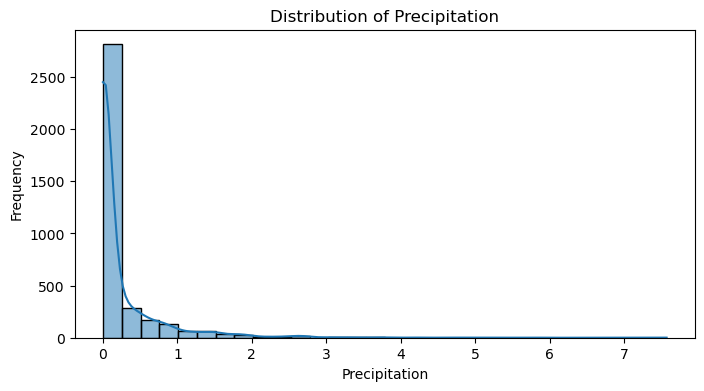

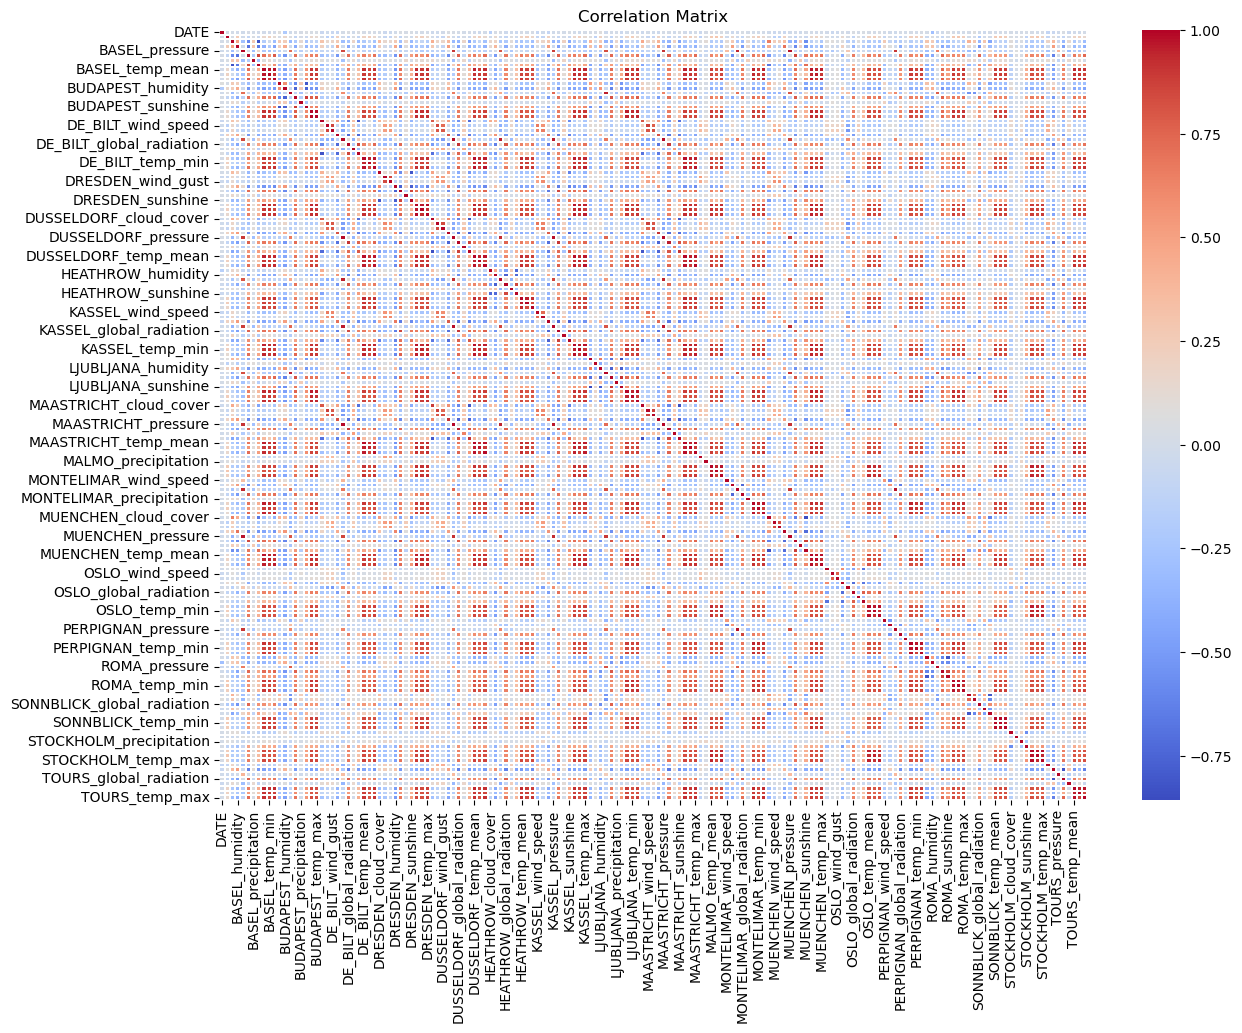

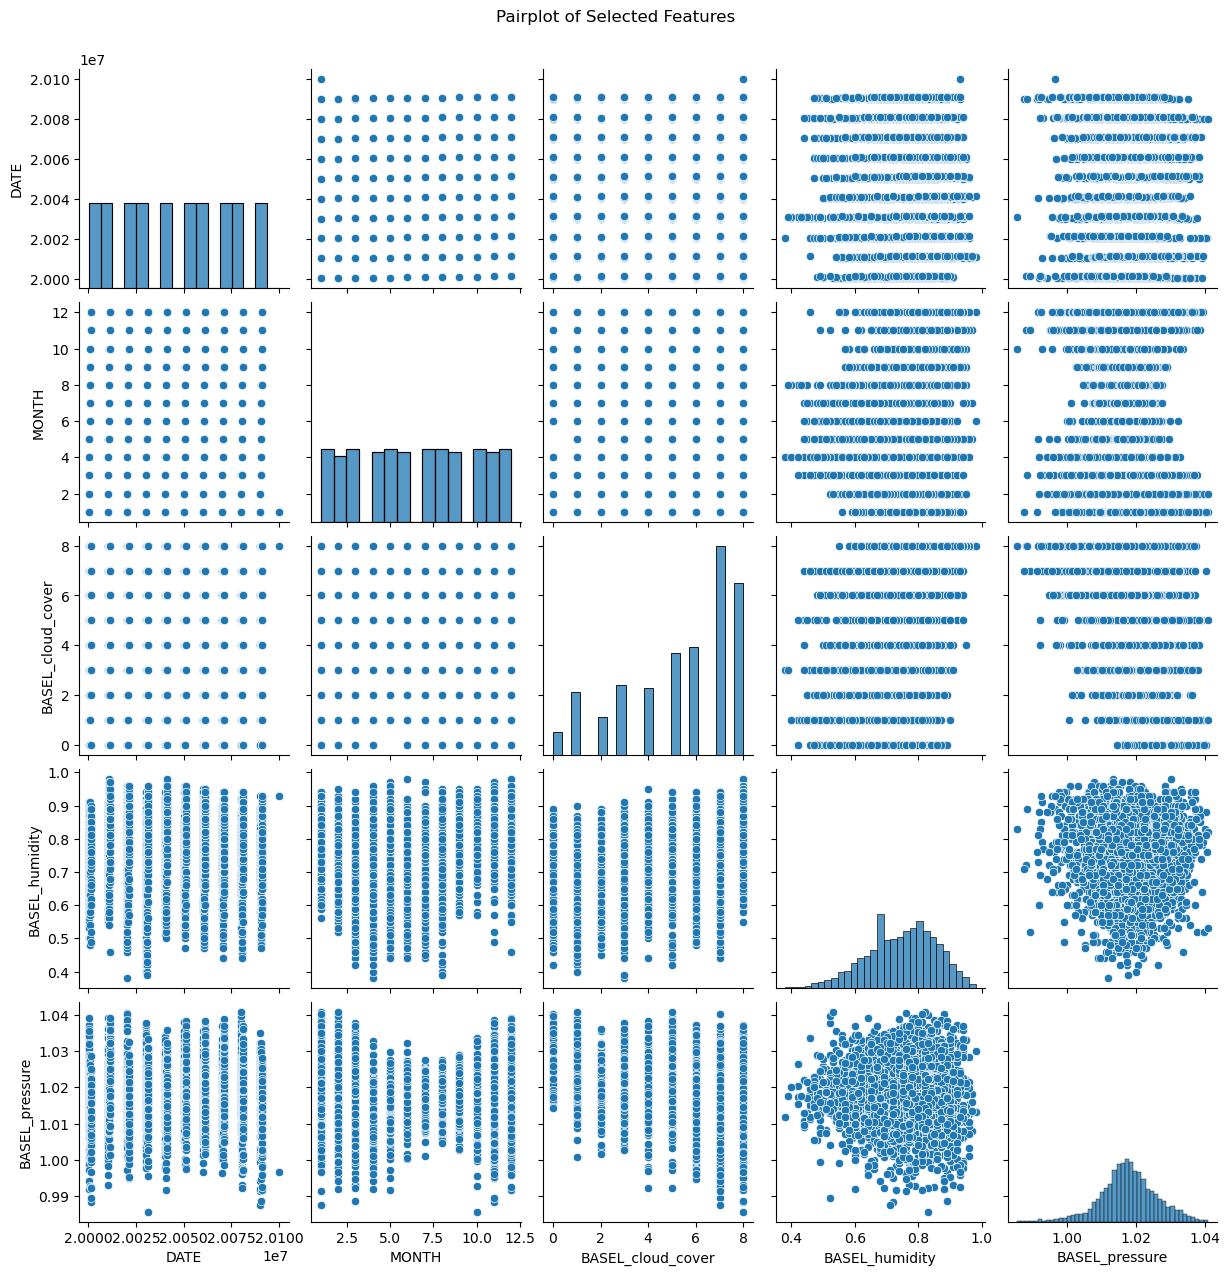

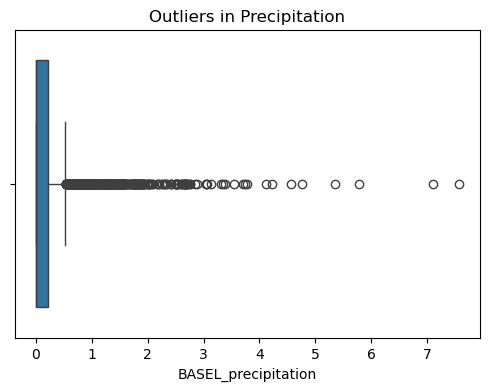

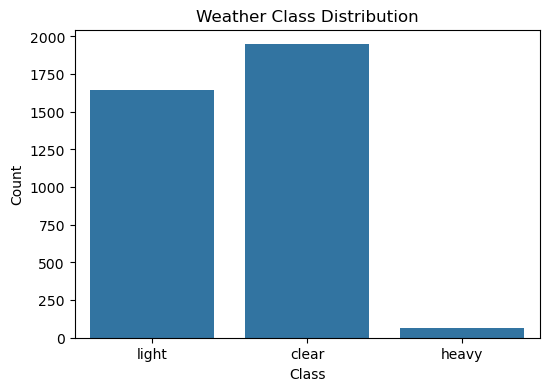

In [2]:
# Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information
print("Dataset shape:", df.shape)
print(df.head())
print(df.describe())
print(df.info())

# Distribution of precipitation
plt.figure(figsize=(8, 4))
sns.histplot(df[precip_col], bins=30, kde=True)
plt.title("Distribution of Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Frequency")
plt.show()

# Correlation matrix
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.2)
plt.title("Correlation Matrix")
plt.show()

# Pairplot for selected important weather variables
sample_cols = df.select_dtypes(include=["number"]).columns[:5]
sns.pairplot(df[sample_cols])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Outlier detection for precipitation
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[precip_col])
plt.title("Outliers in Precipitation")
plt.show()

# After target creation show class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["weather_class"])
plt.title("Weather Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## Model Training and Evaluation
#### Logistic Regression, K Nearest Neighbors, Support Vector Machine

Evaluating: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       390
           1       1.00      0.50      0.67        12
           2       0.89      0.88      0.88       329

    accuracy                           0.90       731
   macro avg       0.93      0.77      0.82       731
weighted avg       0.90      0.90      0.90       731



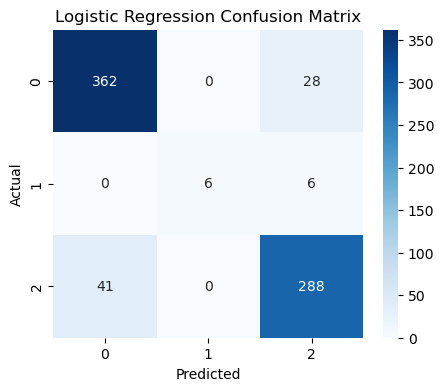

--------------------------------------
Evaluating: KNN
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       390
           1       1.00      0.08      0.15        12
           2       0.72      0.70      0.71       329

    accuracy                           0.74       731
   macro avg       0.82      0.52      0.54       731
weighted avg       0.74      0.74      0.73       731



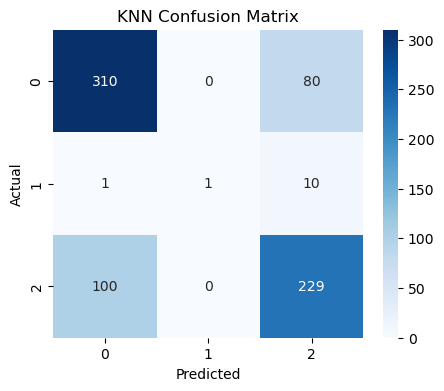

--------------------------------------
Evaluating: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       390
           1       1.00      0.17      0.29        12
           2       0.82      0.78      0.80       329

    accuracy                           0.82       731
   macro avg       0.88      0.61      0.64       731
weighted avg       0.82      0.82      0.82       731



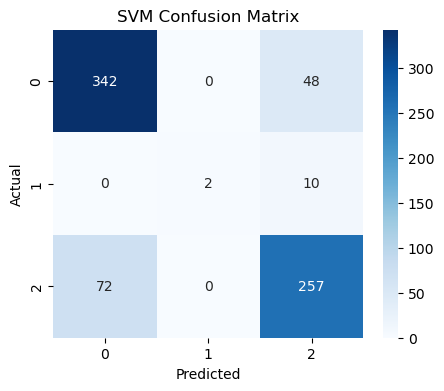

--------------------------------------


In [3]:
# Section 1: Model Training and Evaluation

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize models
model_lr = LogisticRegression(max_iter=500)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_svm = SVC(kernel="rbf")

models = {
    "Logistic Regression": model_lr,
    "KNN": model_knn,
    "SVM": model_svm
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print("Evaluating:", name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results[name] = [acc, pre, rec, f1]
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(name + " Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print("--------------------------------------")


## Model Performance Comparison

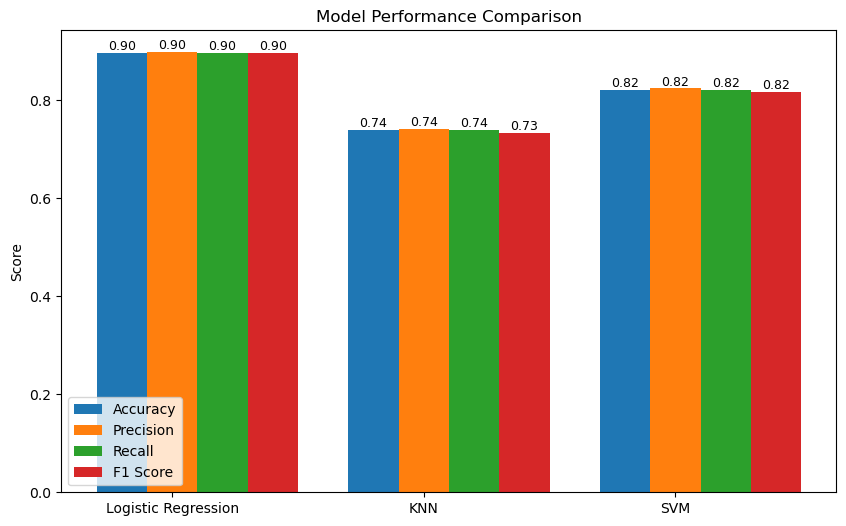

In [4]:
# Section 2: Model Performance Comparison with Value Labels

import numpy as np
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Convert results dictionary to arrays
labels = list(results.keys())
values = np.array(list(results.values()))

plt.figure(figsize=(10, 6))

bar_width = 0.2
positions = np.arange(len(labels))

for i in range(len(metrics)):
    bars = plt.bar(positions + i * bar_width, values[:, i], width=bar_width, label=metrics[i])
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xticks(positions + bar_width, labels)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()
